In [1]:
# Geração do GIF que demonstra a evolução de número de casos de COVID-19 (Portugal Continental)

In [2]:
import os
import sys
from osgeo import ogr
from qgis.core import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/Asus/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/Asus/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
covid_gpkg = "covid-pt-2020-04-26.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded


In [4]:
distrito = QgsProject.instance().mapLayersByName('distrito')[0]
concelho = QgsProject.instance().mapLayersByName('confirmados_concelho')[0]
import matplotlib.pyplot as plt
import numpy as np
import io

def print_graph(date,ii):
    dic = {}
    for c in concelho.getFeatures():
        num = int(c["dico"])
        id = num/int(100)
        id = int(id)
        number = c[date]

        if id not in dic:
            if number == NULL:
                dic[id] = 0
            else :
                if str(type(number)) == '<class \'PyQt5.QtCore.QVariant\'>':
                    dic[id] = int(str(number))
                else:
                    dic[id] = number
        else:
            if number != NULL:
                if str(type(number)) == '<class \'PyQt5.QtCore.QVariant\'>':
                    dic[id] = dic[id] + int(str(number))
                else:
                    dic[id] = dic[id] + number

    ind = 1
    dic_index = {}
    for d in distrito.getFeatures():
        dic_index[ind] = d["distrito"]
        ind += 1

    dist = {}
    for d in distrito.getFeatures():
        cases = list(dic_index.keys())[list(dic_index.values()).index(d["distrito"])]
        case = dic[int(cases)]
        dist[d["distrito"]] = case 
    
    x = dist.keys()
    y = dist.values()
    plt.figure(figsize=(27, 8))
    #plt.scatter(x, y)
    
    lst = []
    for key in dist.keys():
        lst.append((key,dist[key]))
    
    labels, ys = zip(*lst)
    xs = np.arange(len(labels)) 
    width = 1
    plt.bar(xs, ys, width, align='center')
    plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels    
    plt.title("Número de casos no dia " + str(date))
    string = '{}.png'.format(ii)
    plt.ylim(0, 9000)
    plt.savefig(string,format='png')
    plt.plot()
    plt.close()
    

In [5]:
import pandas as pd
df = pd.read_csv("concelhos.csv")
cn = list(df)
col_name = cn[3:36]
col_name.append('26/04/2020')

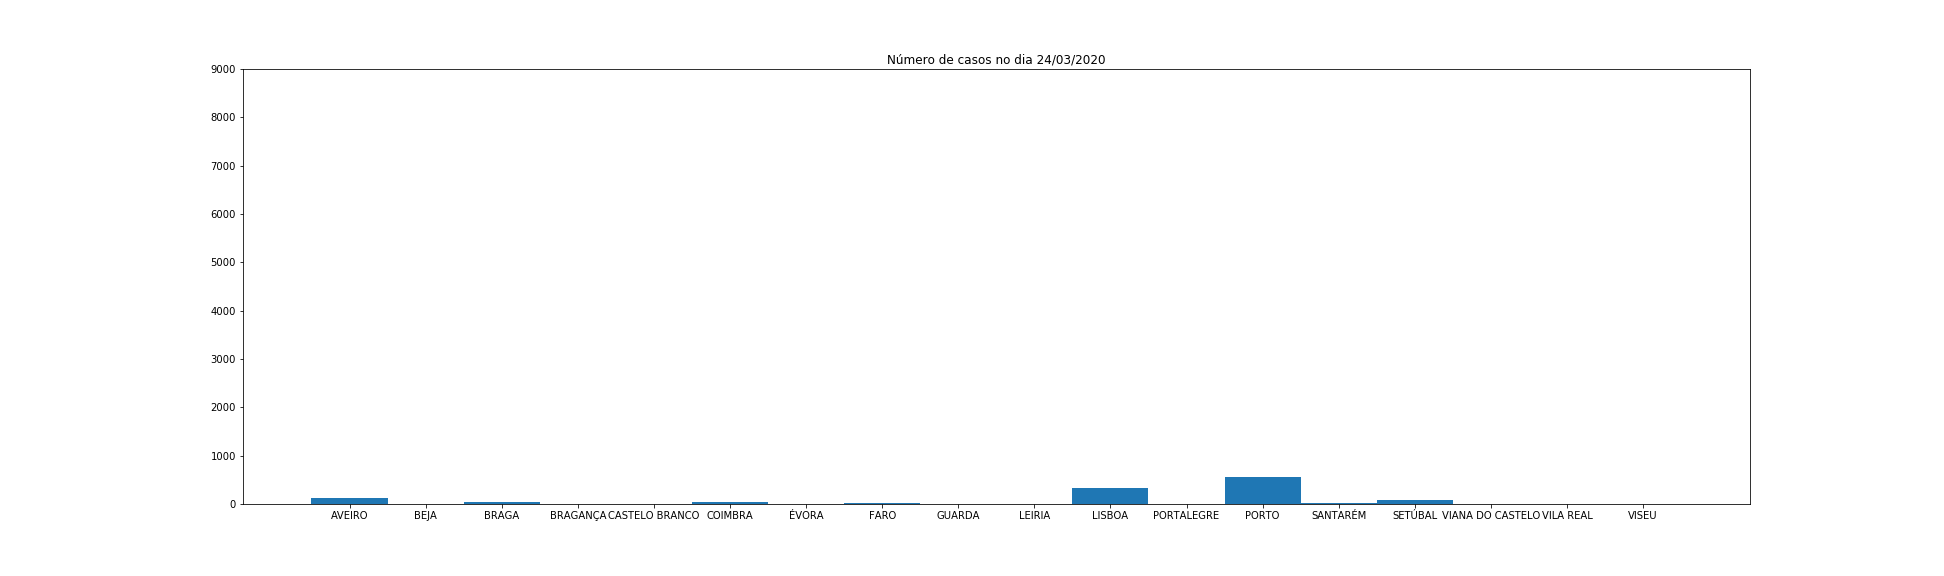

In [6]:
import imageio as io
from IPython.display import Image
frame = ['{}.png'.format(i) for i in range(len(col_name))]
ii = 0
print_graph('26/04/2020',ii)

for i in col_name:
    print_graph(i,ii)
    ii +=1

render = []
for ff in frame:
    render.append(io.imread(ff))

io.mimsave('evolution.gif', render, duration = 0.5)
with open('evolution.gif','rb') as f:
    display(Image(data=f.read(), format='gif'))

import os
for i in frame:
    os.remove(i)
    

In [7]:
# Mostrar o estado de portugal no dia 20 de Abril de 2020, (mostrando o nº de dias que foram lançados estes valores)

In [8]:
projectName = 'portugal_cases.qgz'
project = QgsProject.instance()
project.read(projectName)
for layer in QgsProject.instance().mapLayers().values():
    print('reload layer {}'.format( layer.name() ))
    layer.reload()

reload layer cities
reload layer covid-pt-2020-04-26 distrito


A exportar a composição Mapa_Portugal em PNG...
Feito!


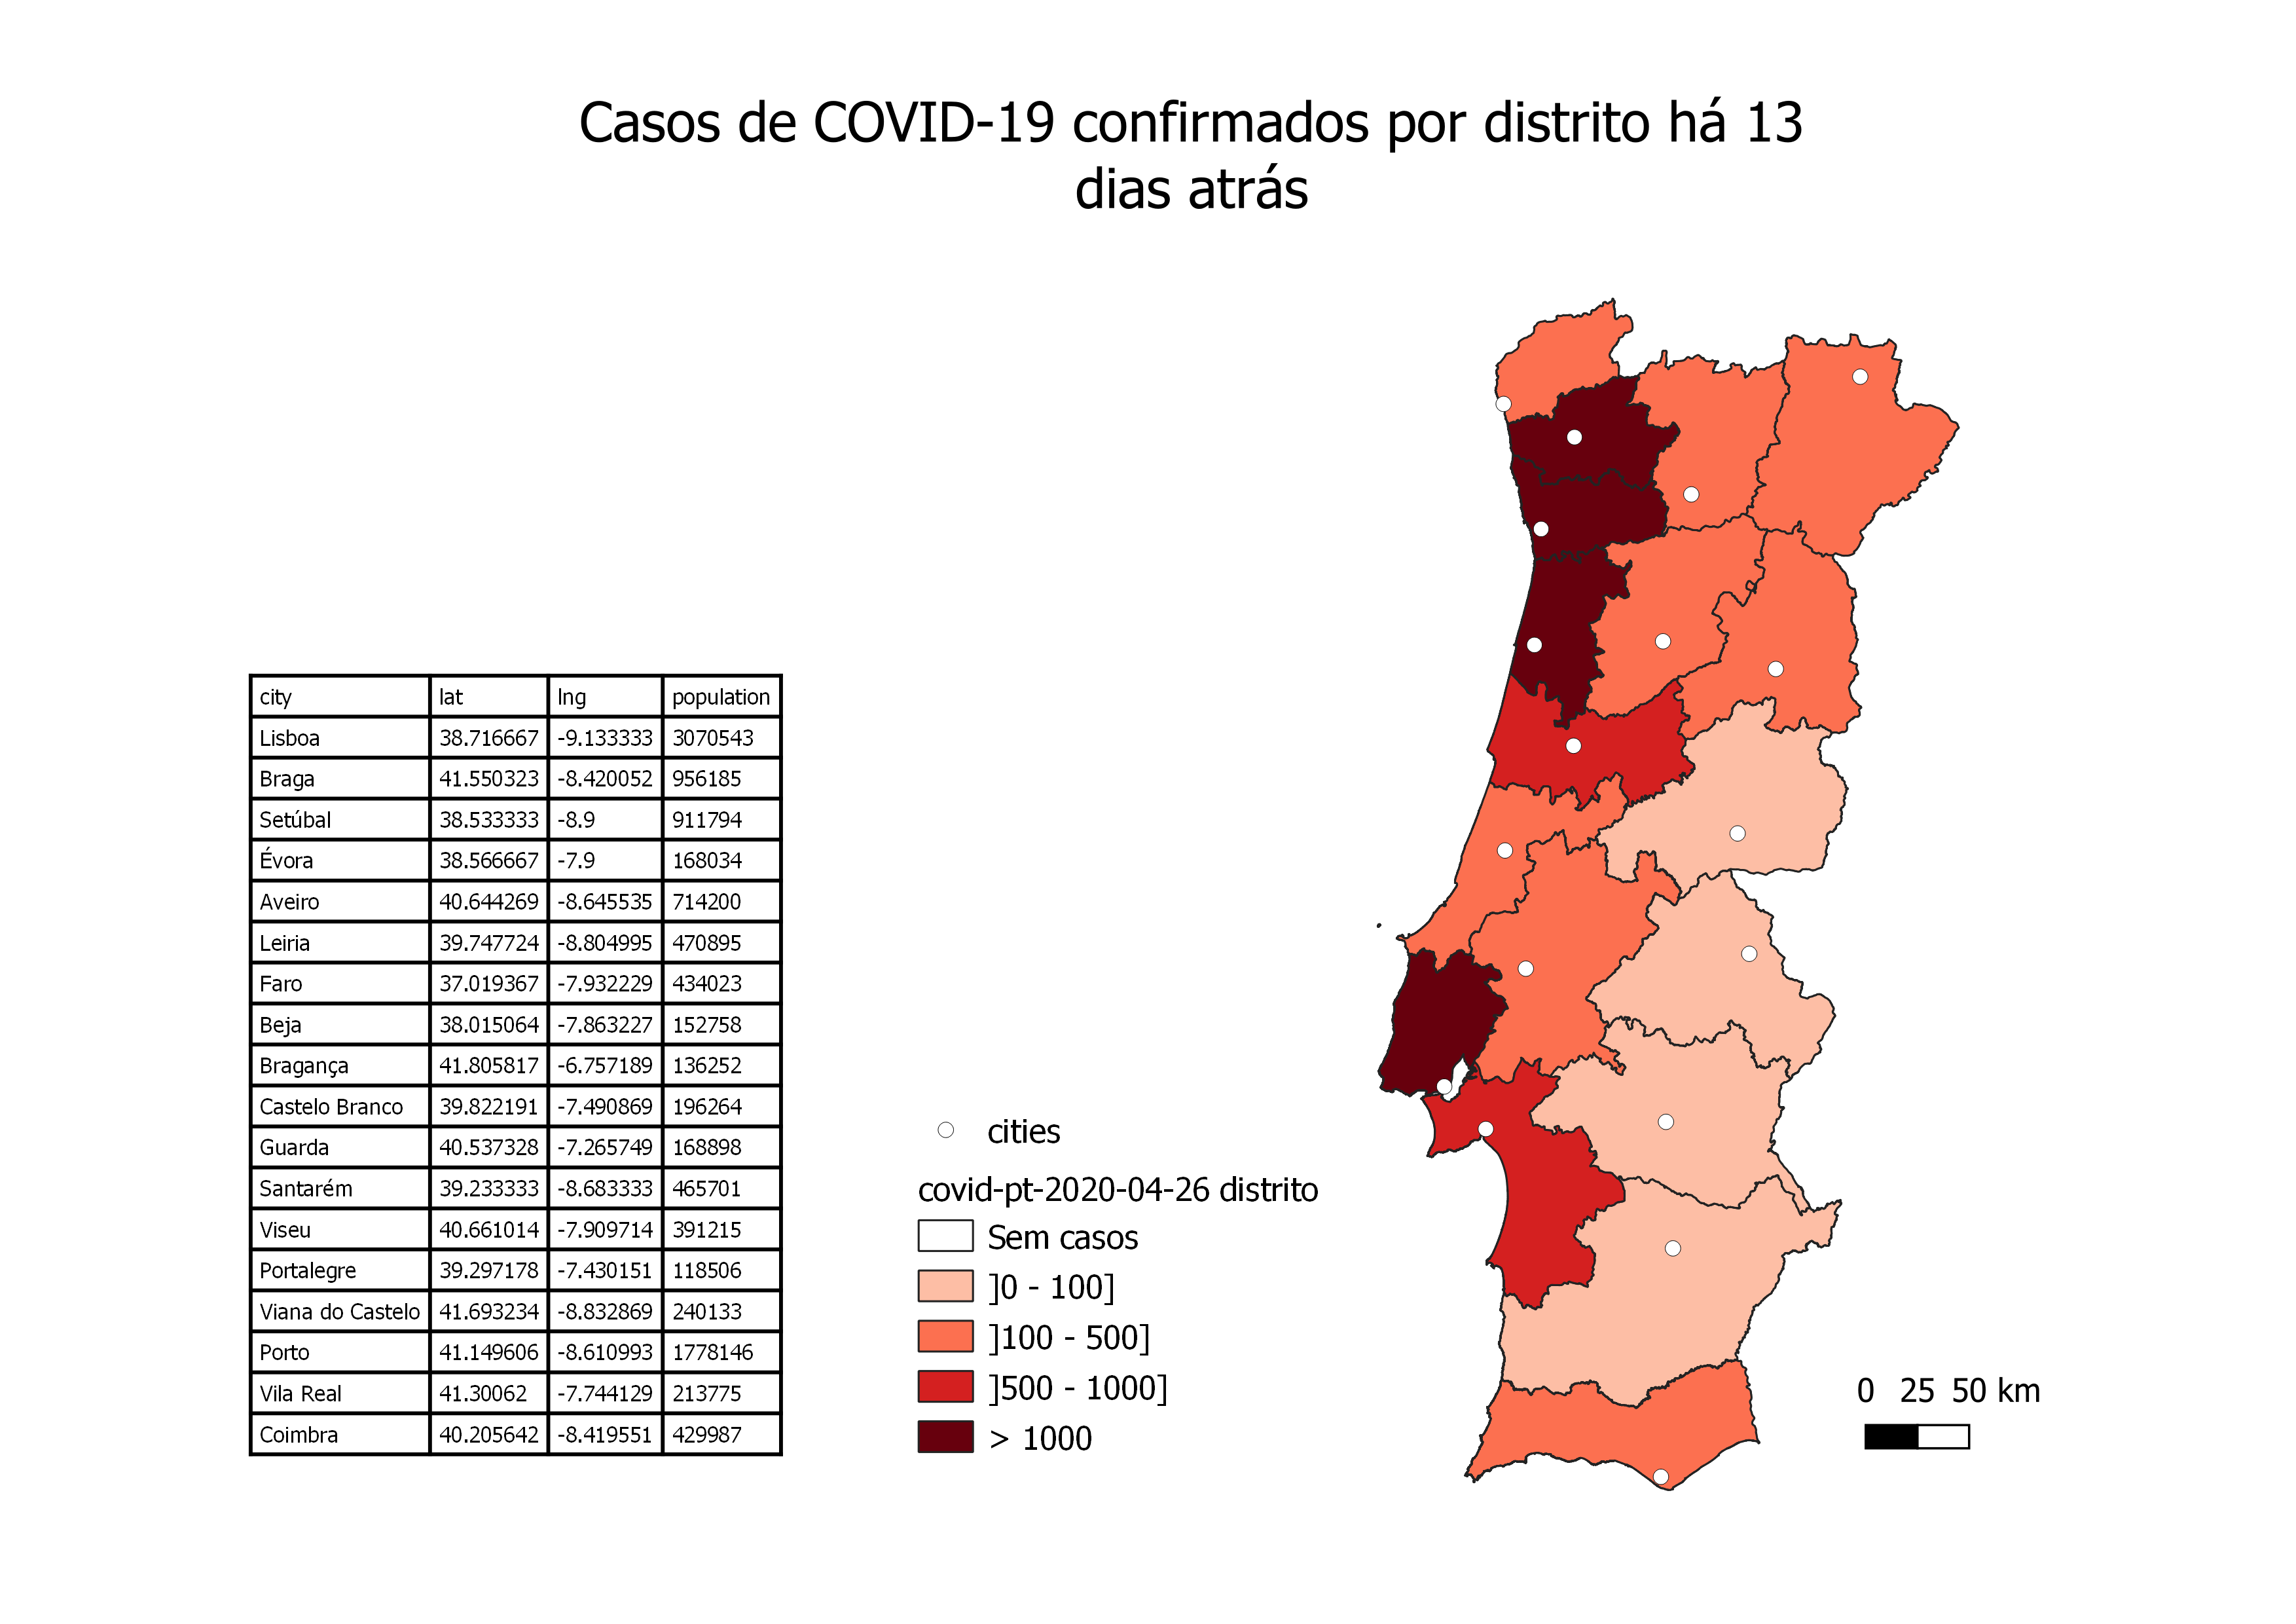

In [9]:
from datetime import datetime, timedelta
altdate = (datetime.now() - datetime(2020,4,20)).days
manager = project.layoutManager()

layoutName = 'Mapa_Portugal'
mapaportugal = './tmp/Mapa_Portugal.png'
layout = manager.layoutByName(layoutName)
if layout:
    titulo = layout.itemById('título');
    titulo.setText("Casos de COVID-19 confirmados por distrito há {} dias atrás \n".format(altdate))
    exporter = QgsLayoutExporter(layout)
    print("A exportar a composição {} em PNG...".format(layoutName))
    exporter.exportToImage( mapaportugal, QgsLayoutExporter.ImageExportSettings() )
    print("Feito!")
else:
    print('Problema a ler as composições do projeto')
    
from IPython.display import Image
Image( mapaportugal )